<a href="https://colab.research.google.com/github/miguel-algaba/Leaf-Recognition/blob/main/Demostrador_basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ultralytics


In [6]:
!pip install supervision

Saving 13001961574339_jpg.rf.681ace9cd81104e201af4aacb0b43aa4.jpg to 13001961574339_jpg.rf.681ace9cd81104e201af4aacb0b43aa4.jpg
Saving 13001961578889_jpg.rf.54542766446ccf83fe9b2bbcfe2bad9f.jpg to 13001961578889_jpg.rf.54542766446ccf83fe9b2bbcfe2bad9f.jpg
Saving try016.jpg to try016.jpg
Saving try021.jpg to try021.jpg

0: 192x256 1 clase 17, 128.3ms
Speed: 1.3ms preprocess, 128.3ms inference, 1.2ms postprocess per image at shape (1, 3, 192, 256)


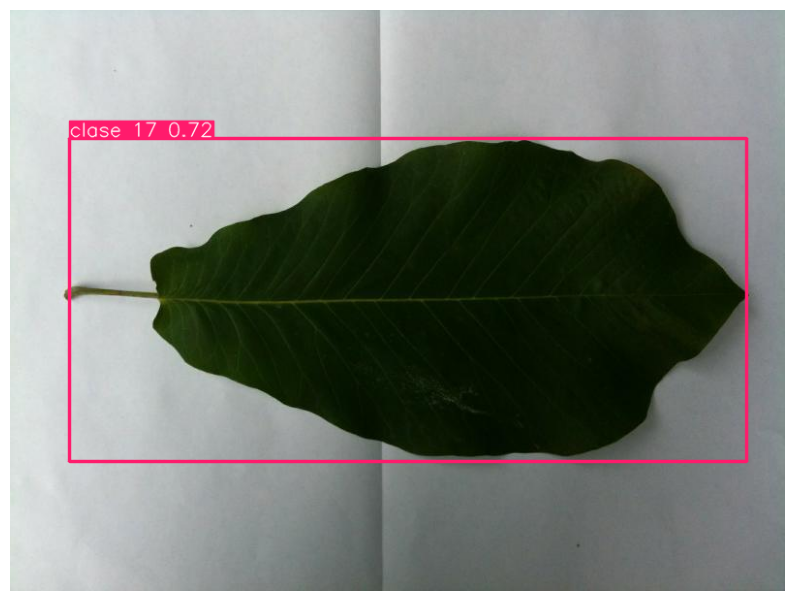

Hay 1 hojas del tipo 17. Hoja de Magnolia de hojas grandes. Magnolia macrophylla

0: 192x256 1 clase 17, 53.4ms
Speed: 1.1ms preprocess, 53.4ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 256)


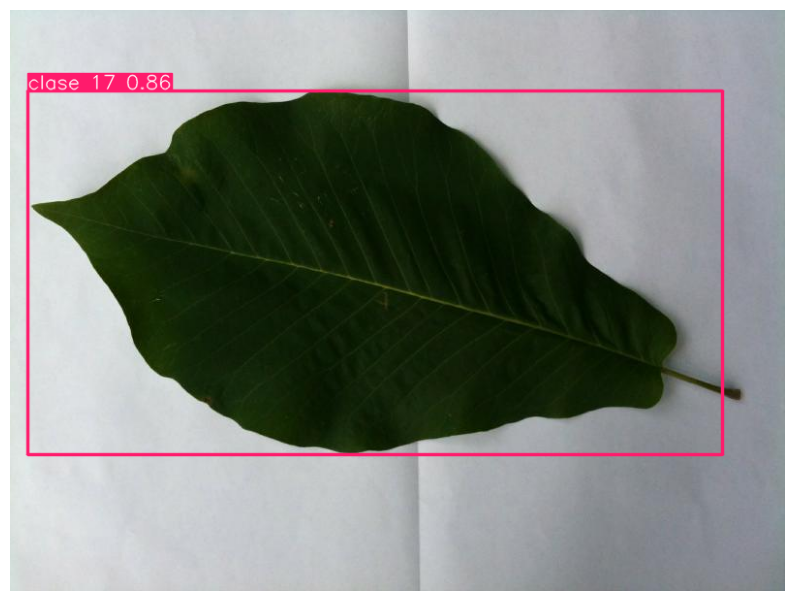

Hay 1 hojas del tipo 17. Hoja de Magnolia de hojas grandes. Magnolia macrophylla

0: 256x192 10 clase 02s, 54.7ms
Speed: 1.1ms preprocess, 54.7ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 192)


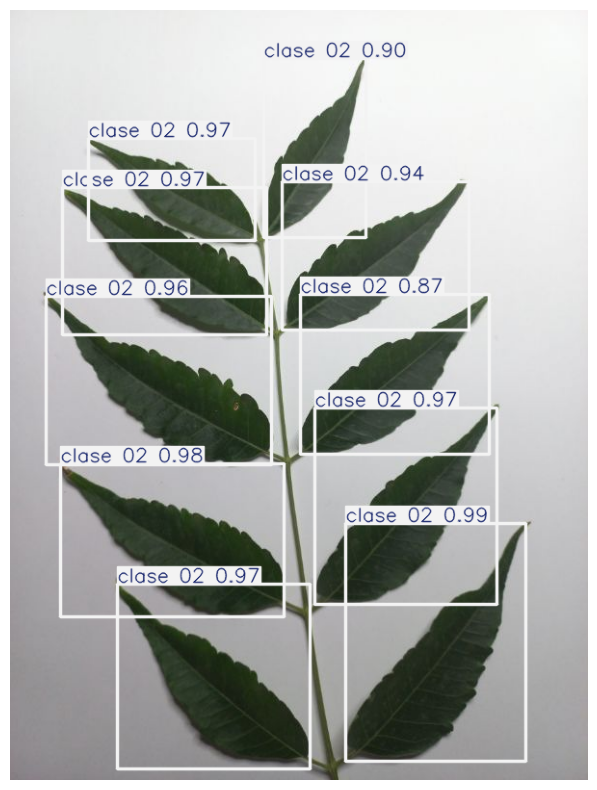

Hay 10 hojas del tipo 2. Hoja de Cinamomo. Melia azedarach

0: 256x192 1 clase 00, 1 clase 01, 1 clase 02, 2 clase 03s, 56.1ms
Speed: 1.1ms preprocess, 56.1ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 192)


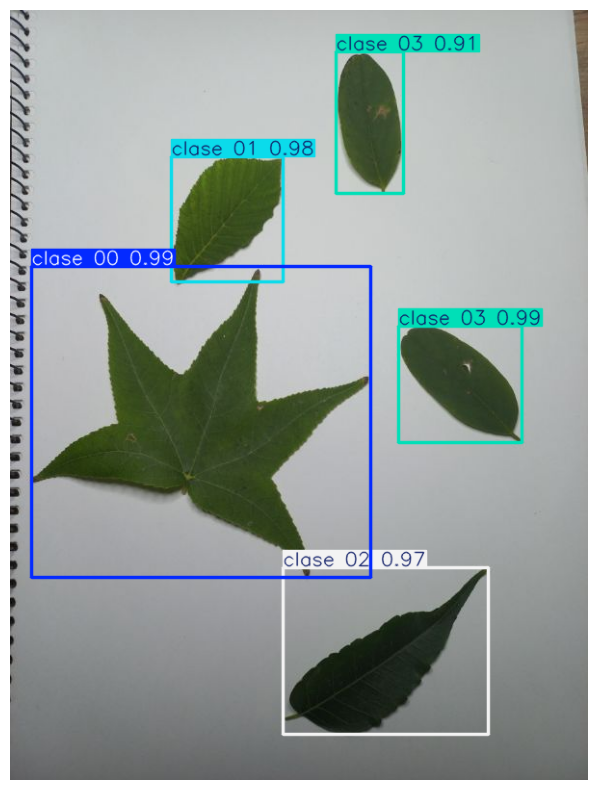

Hay 2 hojas del tipo 3. Hoja de Falsa acacia. Robinia pseudoacacia
Hay 1 hojas del tipo 0. Hoja de Liquidambar. Liquidambar styraciflua
Hay 1 hojas del tipo 1. Hoja de Castaño de indias. Aesculus hippocastanum
Hay 1 hojas del tipo 2. Hoja de Cinamomo. Melia azedarach


In [10]:
# Importar las librerías necesarias
import cv2
import numpy as np
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
from ultralytics import YOLO
from supervision import BoxAnnotator
from supervision.detection.core import Detections
from google.colab import files
import io

# Diccionario de clases
dic = {0: "Liquidambar. Liquidambar styraciflua",
       1: "Castaño de indias. Aesculus hippocastanum",
       2: "Cinamomo. Melia azedarach",
       3: "Falsa acacia. Robinia pseudoacacia",
       4: "Ciruelo rojo. Prunus cerasifera",
       5: "Aligustre del Japón. Ligustrum japonicum",
       6: "Arce real. Acer platanoides",
       7: "Olivo. Olea europaea",
       8: "Olmo de Siberia. Ulmus pumila",
       9: "Pino carrasco. Pinus halepensis",
       10: "Pino piñonero.Pinus pinera",
       11: "Tuya occidental.Thuja occidentalis",
       12: "Larix siberiana.Larix sibirica",
       13: "Nuez americana.Staphylea trifolia",
       14: "Roble de los postes.Quercus stellata",
       15: "Roble de agua.Quercus nigra",
       16: "Roble castaño.Quercus prinus",
       17: "Magnolia de hojas grandes. Magnolia macrophylla",
       18: "Tulipífero de Virginia.Liriodendron tulipifera",
       19: "Higuera.Ficus carica",
       20: "Olmo rojo.Ulmus rubra",
       21: "Populus grandidentata. Chopo americano",
       22: "Espino blanco helado.Crataegus pruinosa",
       23: "Laurel de nieve.Chionanthus virginicus",
       24: "Catalpa común. Catalpa bignonioides",
       25: "Arce de Pensilvania.Acer pensylvanicum",
       26: "Tilo norteño.Tilia cordata",
       27: "Roble negro del este. Quercus velutina",
       28: "Encino rojo de pantano.Quercus Shumardii",
       29: "Encino de piedra.Quercus muehlenbergii"
       }

# Función para corregir la orientación de la imagen
def correct_image_orientation(image):
    try:
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break
        exif = image._getexif()
        if exif is not None:
            if exif[orientation] == 3:
                image = image.rotate(180, expand=True)
            elif exif[orientation] == 6:
                image = image.rotate(270, expand=True)
            elif exif[orientation] == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        pass
    return image

# Cargar el modelo de YOLO
model = YOLO("best.pt")

# Función para realizar la predicción
def predict_and_display(image_path):
    img = cv2.imread(image_path)
    results = model.predict(img, imgsz=256, conf=0.5)

    for r in results:
        im_array = r.plot()  # Plot a BGR numpy array of predictions

        # Mostrar la imagen con anotaciones
        plt.figure(figsize=(10, 10))
        plt.imshow(im_array[..., ::-1])  # Convert BGR to RGB
        plt.axis('off')
        plt.show()

        # Contar las clases detectadas
        l = [int(r.boxes.data[i - 1][5]) for i in range(len(r.boxes.data))]
        d = dict(zip(l, map(lambda x: l.count(x), l)))

        for j in range(len(d.values())):
            print(f"Hay {list(d.values())[j]} hojas del tipo {list(d.keys())[j]}. Hoja de {dic[list(d.keys())[j]]}")

# Cargar una imagen desde el sistema de archivos
uploaded = files.upload()

# Predecir y mostrar resultados para cada imagen cargada
for filename in uploaded.keys():
    image_path = filename
    predict_and_display(image_path)